<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anton\AppData\Local\Temp\ipykernel_35672\3835174084.py:18: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(data, sep="\s+", header=None)


   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index  \
0                    108  ...         0.4706         1.0000   
1                    123  ...         0.6000         0.9

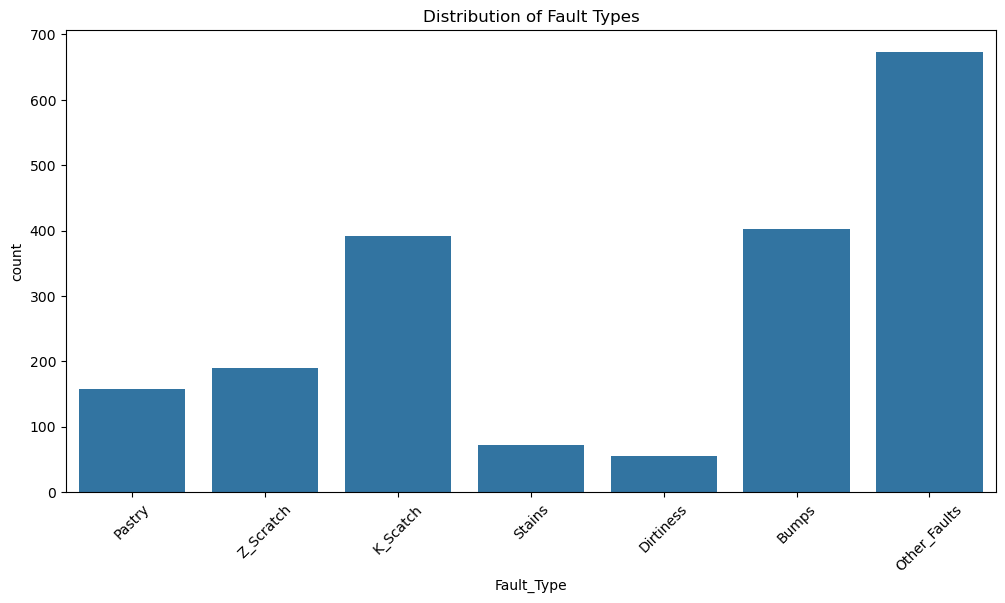

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO

# Download the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA"
response = requests.get(url)
data = StringIO(response.text)

# Read the data into a pandas DataFrame
df = pd.read_csv(data, sep="\s+", header=None)

# Assign column names
column_names = [
    'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 
    'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 
    'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 
    'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 
    'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 
    'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 
    'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 
    'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 
    'Dirtiness', 'Bumps', 'Other_Faults'
]

df.columns = column_names

# Identify the target variable
fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['Fault_Type'] = df[fault_types].idxmax(axis=1)

# Drop the individual fault columns
df = df.drop(columns=fault_types)

# Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of fault types
plt.figure(figsize=(12, 6))
sns.countplot(x='Fault_Type', data=df)
plt.title('Distribution of Fault Types')
plt.xticks(rotation=45)
plt.show()


Accuracy: 0.7275064267352185

Classification Report:
              precision    recall  f1-score   support

       Bumps       0.49      0.57      0.53        72
   Dirtiness       0.55      0.75      0.63         8
    K_Scatch       0.92      0.95      0.93        83
Other_Faults       0.76      0.68      0.72       143
      Pastry       0.41      0.41      0.41        29
      Stains       0.92      0.92      0.92        13
   Z_Scratch       0.92      0.88      0.90        41

    accuracy                           0.73       389
   macro avg       0.71      0.74      0.72       389
weighted avg       0.74      0.73      0.73       389



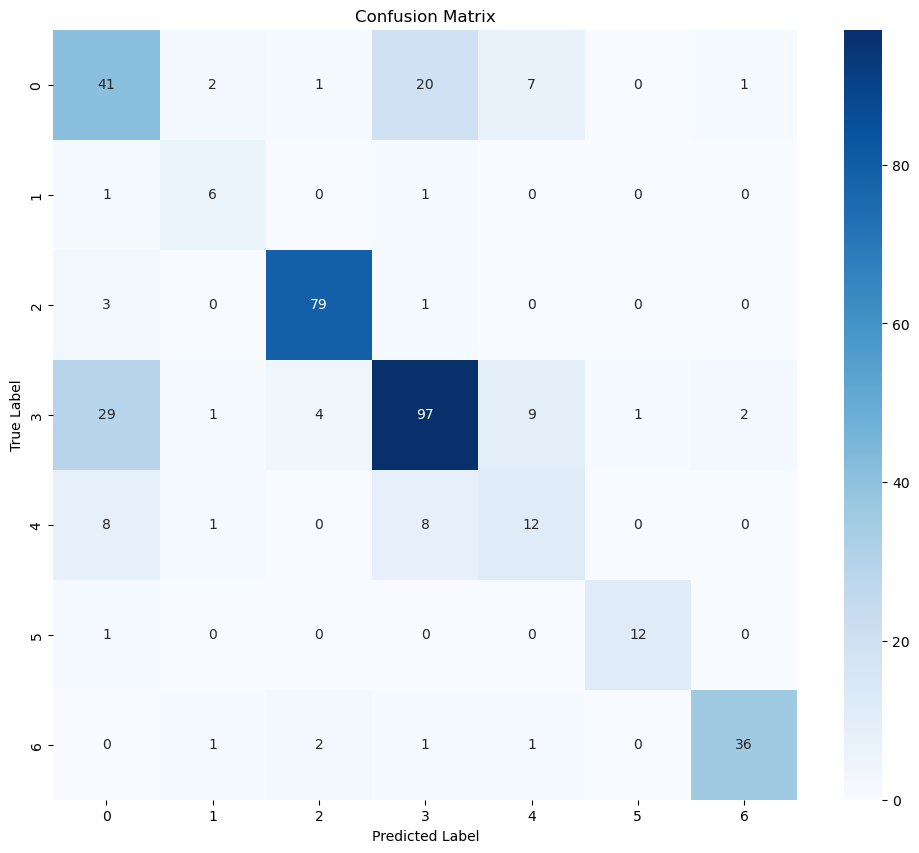

In [4]:

# Preprocessing
# Separate features and target
X = df.drop('Fault_Type', axis=1)
y = df['Fault_Type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building with Gini criterion
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred = dt_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [8]:

# Tree Visualization
plt.figure(figsize=(200, 100))
plot_tree(dt_classifier, feature_names=X.columns, class_names=dt_classifier.classes_, filled=True, rounded=True, max_depth=5)
plt.title("Decision Tree Visualization (Gini, Limited to Depth 3)")
plt.savefig("output_2.png")
plt.show()


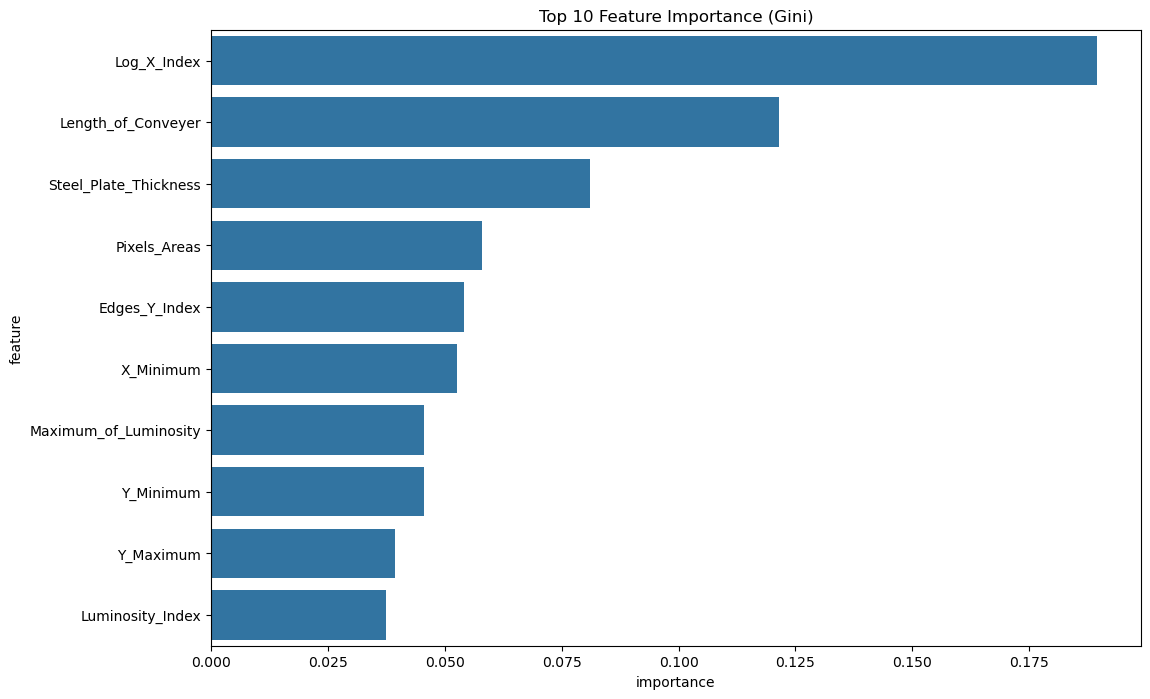


Conclusion:
1. The decision tree model using Gini impurity has been successfully trained on the Steel Plates Faults dataset.
2. Key features influencing fault types have been identified.
3. This model can be used as a starting point for predicting fault types in steel plates.
4. The Gini impurity criterion was used for splitting nodes in the decision tree.
5. Further improvements could include tuning hyperparameters or exploring ensemble methods.


In [9]:

# Feature Importance
feature_importance = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values ('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importance (Gini)')
plt.show()

# Conclusion
print("\nConclusion:")
print("1. The decision tree model using Gini impurity has been successfully trained on the Steel Plates Faults dataset.")
print("2. Key features influencing fault types have been identified.")
print("3. This model can be used as a starting point for predicting fault types in steel plates.")
print("4. The Gini impurity criterion was used for splitting nodes in the decision tree.")
print("5. Further improvements could include tuning hyperparameters or exploring ensemble methods.")
